In [1]:
import tensorflow as tf
from skimage import transform
from skimage import data
from skimage import io
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random

In [4]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = os.getcwd()
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

In [5]:
images_array = np.array(images)
labels_array = np.array(labels)

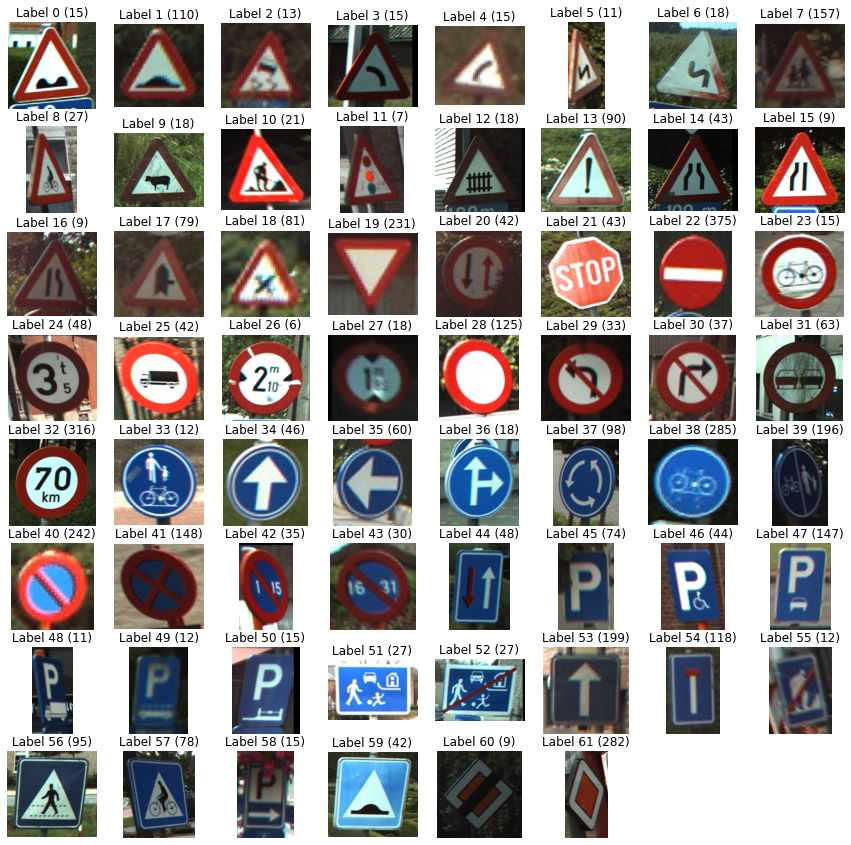

In [6]:
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [7]:
images28 = [transform.resize(image, (28, 28)) for image in images]
images28 = np.array(images28)

In [8]:
images28 = rgb2gray(images28)

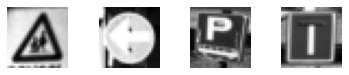

(4575, 28, 28)


In [9]:
traffic_signs = [300, 2250, 3650, 4000]
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

print(images28.shape)

In [10]:
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [30]:
images28 = images28.reshape(-1,28,28,1)

In [13]:
model = models.Sequential()
model.add( layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add( layers.MaxPooling2D( (2,2) ) )
model.add( layers.Conv2D(64,(3,3), activation='relu'))
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Conv2D(128,(3,3), activation='relu'))
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Flatten())
model.add( layers.Dropout(0.5))
model.add( layers.Dense(512, activation='relu'))
model.add( layers.Dense(62, activation='softmax'))

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [20]:
history = model.fit(images28, labels_array,batch_size=40, epochs=50, verbose=1)

Epoch 1/50
4575/4575 [==============================] - 1s 229us/step - loss: 0.7690 - accuracy: 0.7642
Epoch 2/50
4575/4575 [==============================] - 1s 210us/step - loss: 0.7194 - accuracy: 0.7727
Epoch 3/50
4575/4575 [==============================] - 1s 208us/step - loss: 0.7004 - accuracy: 0.7801
Epoch 4/50
4575/4575 [==============================] - 1s 210us/step - loss: 0.6677 - accuracy: 0.7934
Epoch 5/50
4575/4575 [==============================] - 1s 209us/step - loss: 0.6389 - accuracy: 0.7965
Epoch 6/50
4575/4575 [==============================] - 1s 223us/step - loss: 0.6203 - accuracy: 0.8057
Epoch 7/50
4575/4575 [==============================] - 1s 216us/step - loss: 0.6148 - accuracy: 0.7967
Epoch 8/50
4575/4575 [==============================] - 1s 217us/step - loss: 0.6095 - accuracy: 0.8125
Epoch 9/50
4575/4575 [==============================] - 1s 208us/step - loss: 0.5789 - accuracy: 0.8177
Epoch 10/50
4575/4575 [==============================] - 1s 217u

In [70]:
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

In [71]:
predicted = model.predict_classes(np.array(sample_images))

In [72]:
sample_images = np.reshape(sample_images, (-1,28,28))

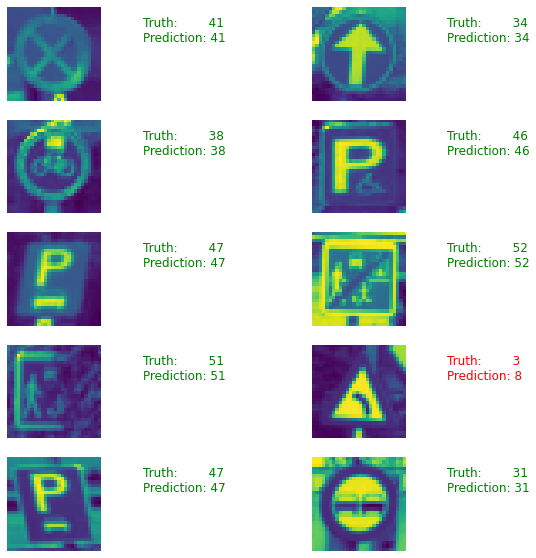

In [73]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()